In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import cpi

In [10]:
import tmdbsimple as tmdb
tmdb.API_KEY = 'ccebd49d8e251b9da6d66134043e7384'
tmdb.REQUESTS_TIMEOUT = 5  # seconds, for both connect and read

In [11]:
def get_movie_info(title, year):
    search = tmdb.Search()
    search.movie(query=title, year=year)
    try:
        id = search.results[0]['id']
        movie = tmdb.Movies(id)
        response = movie.info()
        budget = movie.budget
        revenue = movie.revenue
        return id, budget, revenue
    except:
        try:
            search.movie(query=title)
            id = search.results[0]['id']
            movie = tmdb.Movies(id)
            response = movie.info()
            budget = movie.budget
            revenue = movie.revenue
            print(title, " release year: ", movie.release_date, "supplied year: ", year)
            return id, budget, revenue
        except:
            print(title, " not found in database")
            return None, None

    

In [12]:
# Adjusting pandas display
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 4000

# All Box Office Financials 1977-2023

In [13]:
all_bo_df = pd.read_csv('allboxoffice.csv')
all_bo_df.head()

,Rank,Release,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Year
0,1,Barbie,"636,238,421.00","4,337","162,022,044.00",25.50%,"4,243",Jul 21,-,Warner Bros.,2023
1,2,The Super Mario Bros. Movie,"574,934,330.00","4,371","146,361,865.00",25.50%,"4,343",Apr 5,Sep 7,Universal Pictures,2023
2,3,Spider-Man: Across the Spider-Verse,"381,311,319.00","4,332","120,663,589.00",31.60%,"4,313",Jun 2,Sep 14,Columbia Pictures,2023
3,4,Guardians of the Galaxy Vol. 3,"358,995,815.00","4,450","118,414,021.00",33.00%,"4,450",May 5,-,Walt Disney Studios Motion Pictures,2023
4,5,Oppenheimer,"329,862,540.00","3,761","82,455,420.00",25.00%,"3,610",Jul 21,-,Universal Pictures,2023


### Collecting Data

In [14]:
# all_bo_df[['id', 'budget', 'TMDBrevenue']] = all_bo_df.apply(lambda row: pd.Series(get_movie_info(row['Release'], row['Year'])), axis=1)

Avatar 2022 Re-release  not found in database
Hocus Pocus2020 Re-release  not found in database
Star Wars: Episode V - The Empire Strikes Back2020 Re-release  not found in database
The Lion King2011 3D Release  not found in database
Knight and Day2010 Re-release  not found in database
Star Wars: Episode IV - A New Hope1997 Special Edition  not found in database
Star Wars: Episode V - The Empire Strikes Back1997 Special Edition  not found in database
Star Wars: Episode VI - Return of the Jedi1997 Special Edition  not found in database
Snow White and the Seven Dwarfs1993 Re-release  not found in database
One Hundred and One Dalmatians1991 Re-release  not found in database
The Jungle Book1990 Re-release  not found in database
Fantasia1990 Re-release  not found in database
Peter Pan1989 Re-release  not found in database
Bambi1988 Re-release  not found in database
The Fox and the Hound1988 Re-release  not found in database
Snow White and the Seven Dwarfs1987 Re-release  not found in databas

In [82]:
# Correct 1977 Freaky Friday
# all_bo_df.at[2319, 'id'] = 16084
# all_bo_df.at[2319, 'budget'] = None
# all_bo_df.at[2319, 'TMDBrevenue'] = 25942000

In [83]:
# all_bo_df.at[94, 'budget'] = 0

In [84]:
# clean_df = all_bo_df[all_bo_df.budget != 0]
# clean_df = clean_df[clean_df.TMDBrevenue != 0]
# clean_df.dropna(inplace=True)
# clean_df.replace('-', '-1', inplace=True)
# clean_df.rename(columns={'TMDBrevenue': 'Worldwide Gross', 'Gross': 'Domestic Gross'}, inplace=True)

# clean_df.at[1572, 'Worldwide Gross'] = 94000000
# clean_df.at[1572, 'budget'] = 26000000

In [85]:
# # Cleaning Datatypes and Missing Vals
# clean_df['Domestic Gross'] = [float(str(num).replace(',','')) for num in clean_df['Domestic Gross']]
# clean_df['Opening'] = [float(str(num).replace(',','')) for num in clean_df['Opening']]
# clean_df['% of Total'] = [str(num).replace('<','') for num in clean_df['% of Total']]
# clean_df['% of Total'] = [float(str(num).replace('%',''))/100.0 for num in clean_df['% of Total']]
# clean_df['Max Th'] = [float(str(num).replace(',','')) for num in clean_df['Max Th']]
# clean_df['Open Th'] = [float(str(num).replace(',','')) for num in clean_df['Open Th']]
# clean_df.replace(-.01, np.nan, inplace=True)
# clean_df.replace(-1, np.nan, inplace=True)
# clean_df.replace('-1', '-', inplace=True)

# clean_df['Release_Date'] = clean_df['Open'] + ' ' + clean_df['Year'].astype(str)
# clean_df['Release_Date'] = pd.to_datetime(clean_df['Release_Date'], format='%b %d %Y')

In [86]:
# clean_df['Profit'] = clean_df['Worldwide Gross'] - clean_df['budget']

In [88]:
# adj_df = clean_df
# adj_df['Domestic Gross'] = adj_df.apply(
#     lambda row: cpi.inflate(row['Domestic Gross'], row['Year'], to=2023), axis=1
# )
# adj_df['Worldwide Gross'] = adj_df.apply(
#     lambda row: cpi.inflate(row['Worldwide Gross'], row['Year'], to=2023), axis=1
# )
# adj_df['budget'] = adj_df.apply(
#     lambda row: cpi.inflate(row['budget'], row['Year'], to=2023), axis=1
# )
# adj_df['Profit'] = adj_df['Worldwide Gross'] - adj_df['budget']

# adj_df.head(10)

,Rank,Release,Domestic Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Year,id,budget,Worldwide Gross,Release_Date,Profit
0,1,Barbie,636238421.00,4337.00,162022044.00,0.26,4243.00,Jul 21,-,Warner Bros.,2023,346698.00,145000000.00,1445638421.00,2023-07-21,1300638421.00
1,2,The Super Mario Bros. Movie,574934330.00,4371.00,146361865.00,0.26,4343.00,Apr 5,Sep 7,Universal Pictures,2023,502356.00,100000000.00,1362000000.00,2023-04-05,1262000000.00
2,3,Spider-Man: Across the Spider-Verse,381311319.00,4332.00,120663589.00,0.32,4313.00,Jun 2,Sep 14,Columbia Pictures,2023,569094.00,100000000.00,690615475.00,2023-06-02,590615475.00
3,4,Guardians of the Galaxy Vol. 3,358995815.00,4450.00,118414021.00,0.33,4450.00,May 5,-,Walt Disney Studios Motion Pictures,2023,447365.00,250000000.00,845600000.00,2023-05-05,595600000.00
4,5,Oppenheimer,329862540.00,3761.00,82455420.00,0.25,3610.00,Jul 21,-,Universal Pictures,2023,872585.00,100000000.00,952000000.00,2023-07-21,852000000.00
5,6,The Little Mermaid,298172056.00,4320.00,95578040.00,0.32,4320.00,May 26,Sep 14,Walt Disney Studios Motion Pictures,2023,447277.00,297000000.00,569600000.00,2023-05-26,272600000.00
6,7,Wonka,218402312.00,4213.00,39005800.00,0.18,4203.00,Dec 15,-,Warner Bros.,2023,787699.00,125000000.00,632302312.00,2023-12-15,507302312.00
7,8,Ant-Man and the Wasp: Quantumania,214504909.00,4345.00,106109650.00,0.49,4345.00,Feb 17,Jun 15,Walt Disney Studios Motion Pictures,2023,640146.00,200000000.00,476071180.00,2023-02-17,276071180.00
8,9,John Wick: Chapter 4,187131806.00,3855.00,73817950.00,0.39,3855.00,Mar 24,Jun 15,Lionsgate Films,2023,603692.00,90000000.00,440157245.00,2023-03-24,350157245.00
9,10,Sound of Freedom,184178046.00,3411.00,19680879.00,0.11,2852.00,Jul 4,-,Angel Studios,2023,678512.00,14500000.00,250600000.00,2023-07-04,236100000.00


In [89]:
# adj_df.to_csv('allbo_financials.csv')

### Or Load in Data

In [ ]:
adj_df = pd.read_csv('allbo_financials.csv')

## EDA

In [90]:
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'${x * 1e-6:0.0f}M'
def billions_formatter(x, pos):
    return f'${x * 1e-9:0.00f}B'

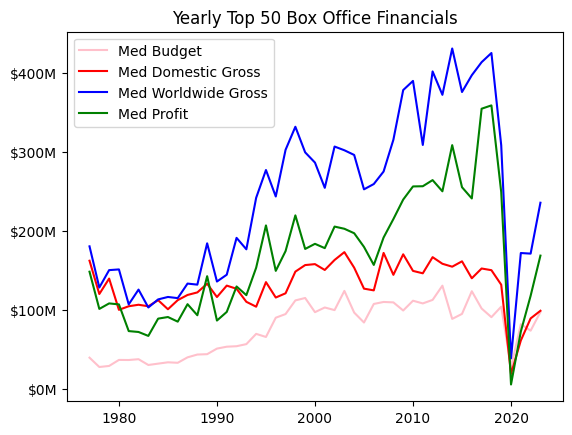

In [91]:
plt.plot(adj_df.Year, adj_df.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(adj_df.Year, adj_df.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(adj_df.Year, adj_df.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(adj_df.Year, adj_df.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Yearly Top 50 Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [92]:
top_25 = adj_df[clean_df['Rank'] <= 25]

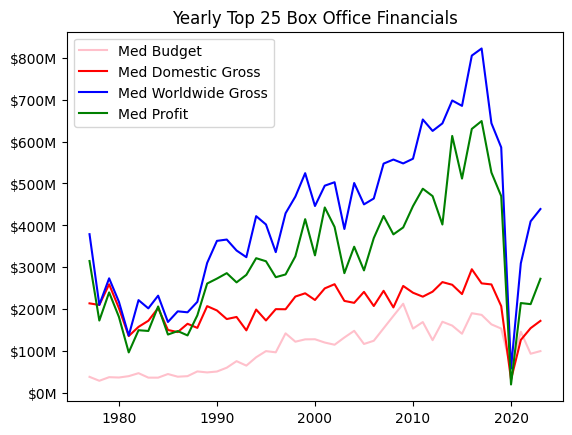

In [93]:
plt.plot(top_25.Year, top_25.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(top_25.Year, top_25.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(top_25.Year, top_25.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(top_25.Year, top_25.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Yearly Top 25 Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [103]:
post_covid = adj_df[adj_df['Year'] > 2020]

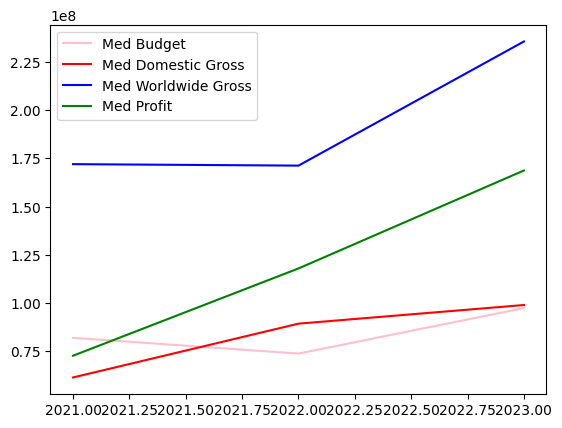

In [104]:
plt.plot(post_covid.Year, post_covid.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])

In [105]:
top_5 = adj_df[adj_df['Rank'] <= 5]

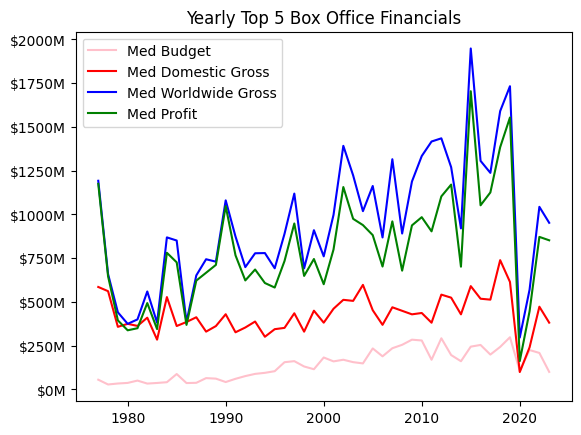

In [106]:
plt.plot(top_5.Year, top_5.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(top_5.Year, top_5.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(top_5.Year, top_5.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(top_5.Year, top_5.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Yearly Top 5 Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [107]:
post_monthly_budg = post_covid.groupby(post_covid['Release_Date'].dt.to_period('M').dt.to_timestamp()).agg({'budget': 'mean'}).reset_index()
post_monthly_prof = post_covid.groupby(post_covid['Release_Date'].dt.to_period('M').dt.to_timestamp()).agg({'Profit': 'mean'}).reset_index()
post_monthly_dom =  post_covid.groupby(post_covid['Release_Date'].dt.to_period('M').dt.to_timestamp()).agg({'Domestic Gross': 'mean'}).reset_index()
post_monthly_world = post_covid.groupby(post_covid['Release_Date'].dt.to_period('M').dt.to_timestamp()).agg({'Worldwide Gross': 'mean'}).reset_index()

(array([18628., 18748., 18871., 18993., 19113., 19236., 19358., 19478.,
        19601., 19723.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01')])

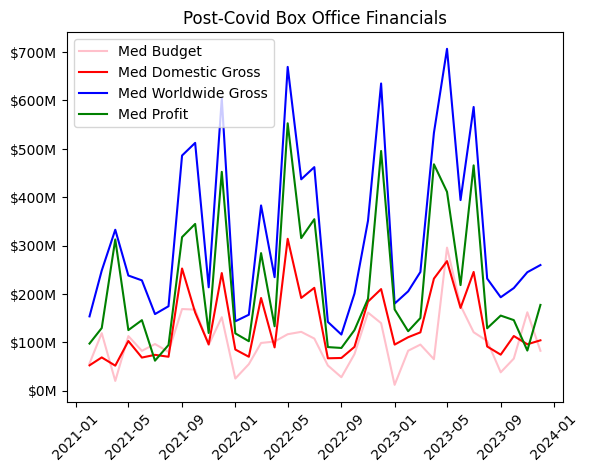

In [108]:
plt.plot(post_monthly_budg['Release_Date'], post_monthly_budg['budget'], color='pink')
plt.plot(post_monthly_world['Release_Date'], post_monthly_dom['Domestic Gross'], color='red')
plt.plot(post_monthly_dom['Release_Date'], post_monthly_world['Worldwide Gross'], color='blue')
plt.plot(post_monthly_prof['Release_Date'], post_monthly_prof['Profit'], color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Post-Covid Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=45)
#plt.legend(['Budget', 'Domestic Gross', 'Profit'])

In [109]:
post_covid.sort_values(by='Release_Date', ascending=False).head(20)

,Rank,Release,Domestic Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Year,id,budget,Worldwide Gross,Release_Date,Profit
46,47,The Boys in the Boat,52641306.00,2687.00,8400548.00,0.16,2557.00,Dec 25,-,-,2023,823452.00,40000000.00,54401583.00,2023-12-25,14401583.00
42,43,The Color Purple,60619191.00,3218.00,11737072.00,0.19,3203.00,Dec 25,-,Warner Bros.,2023,558915.00,95000000.00,67519191.00,2023-12-25,-27480809.00
19,20,Migration,127306285.00,3839.00,12453275.00,0.10,3761.00,Dec 22,-,Universal Pictures,2023,940551.00,72000000.00,298106960.00,2023-12-22,226106960.00
20,21,Aquaman and the Lost Kingdom,124481226.00,3787.00,27686211.00,0.22,3706.00,Dec 22,-,Warner Bros.,2023,572802.00,205000000.00,434381226.00,2023-12-22,229381226.00
28,29,Anyone But You,88319668.00,3055.00,6000344.00,0.07,3055.00,Dec 22,-,Columbia Pictures,2023,1072790.00,25000000.00,214891370.00,2023-12-22,189891370.00
6,7,Wonka,218402312.00,4213.00,39005800.00,0.18,4203.00,Dec 15,-,Warner Bros.,2023,787699.00,125000000.00,632302312.00,2023-12-15,507302312.00
44,45,Godzilla Minus One,56418793.00,2622.00,11419975.00,0.20,2308.00,Dec 1,-,-,2023,940721.00,15000000.00,115857413.00,2023-12-01,100857413.00
41,42,Napoleon,61524375.00,3500.00,20638887.00,0.34,3500.00,Nov 22,-,Columbia Pictures,2023,753342.00,165000000.00,220597098.00,2023-11-22,55597098.00
40,41,Wish,63973821.00,3900.00,19698228.00,0.31,3900.00,Nov 22,-,Walt Disney Studios Motion Pictures,2023,1022796.00,175000000.00,251720820.00,2023-11-22,76720820.00
13,14,The Hunger Games: The Ballad of Songbirds & Sn...,166350594.00,3776.00,44607143.00,0.27,3776.00,Nov 17,-,Lionsgate Films,2023,695721.00,100000000.00,337371917.00,2023-11-17,237371917.00


Text(0.5, 1.0, 'Post-Covid Yearly Box Office Financials')

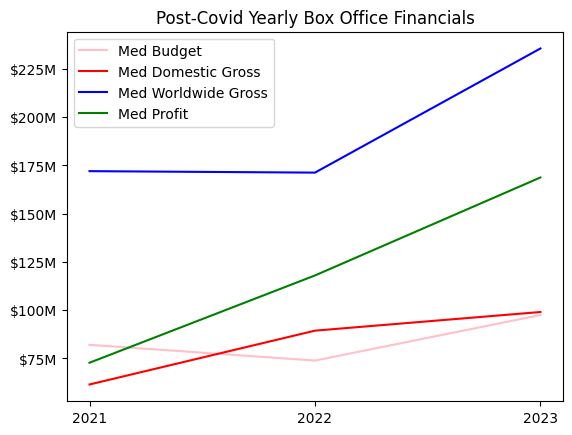

In [118]:
plt.plot(post_covid.Year, post_covid.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.xticks(post_covid['Year'].unique())
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Post-Covid Yearly Box Office Financials')

In [116]:
qpost_monthly_budg = post_covid.groupby(post_covid['Release_Date'].dt.to_period('Q').dt.to_timestamp()).agg({'budget': 'mean'}).reset_index()
qpost_monthly_prof = post_covid.groupby(post_covid['Release_Date'].dt.to_period('Q').dt.to_timestamp()).agg({'Profit': 'mean'}).reset_index()
qpost_monthly_dom =  post_covid.groupby(post_covid['Release_Date'].dt.to_period('Q').dt.to_timestamp()).agg({'Domestic Gross': 'mean'}).reset_index()
qpost_monthly_world = post_covid.groupby(post_covid['Release_Date'].dt.to_period('Q').dt.to_timestamp()).agg({'Worldwide Gross': 'mean'}).reset_index()

(array([18628., 18748., 18871., 18993., 19113., 19236., 19358., 19478.,
        19601.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09')])

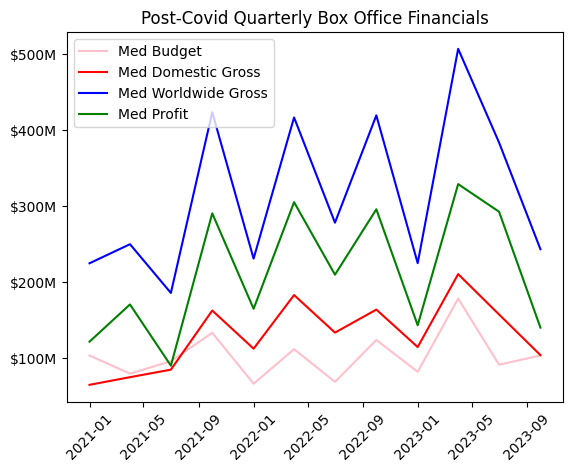

In [117]:
plt.plot(qpost_monthly_budg['Release_Date'], qpost_monthly_budg['budget'], color='pink')
plt.plot(qpost_monthly_world['Release_Date'], qpost_monthly_dom['Domestic Gross'], color='red')
plt.plot(qpost_monthly_dom['Release_Date'], qpost_monthly_world['Worldwide Gross'], color='blue')
plt.plot(qpost_monthly_prof['Release_Date'], qpost_monthly_prof['Profit'], color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Post-Covid Quarterly Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=45)
#plt.legend(['Budget', 'Domestic Gross', 'Profit'])

## Linked Node Box Office EDA

In [119]:
allnodes_df = pd.read_csv('allnodes.csv')
linked_movies = allnodes_df[allnodes_df['Medium'] == 'Movie']

In [120]:
linked_movies.drop(['Wiki_Link', 'Image_Link', 'Medium', 'ID'], axis=1, inplace=True)

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_48967/3834646398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_movies.drop(['Wiki_Link', 'Image_Link', 'Medium', 'ID'], axis=1, inplace=True)


In [121]:
linked_movies['Year'] = linked_movies['Year'].astype('int')

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_48967/3675968858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_movies['Year'] = linked_movies['Year'].astype('int')


In [122]:
# Adjust for Inflation

linked_movies['Domestic_Gross'] = linked_movies.apply(
    lambda row: cpi.inflate(row['Domestic_Gross'], row['Year'], to=2023), axis=1
)
linked_movies['Worldwide_Gross'] = linked_movies.apply(
    lambda row: cpi.inflate(row['Worldwide_Gross'], row['Year'], to=2023), axis=1
)
linked_movies['Production_Budget'] = linked_movies.apply(
    lambda row: cpi.inflate(row['Production_Budget'], row['Year'], to=2023), axis=1
)
linked_movies['Profit'] = linked_movies.apply(
    lambda row: cpi.inflate(row['Profit'], row['Year'], to=2023), axis=1
)

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_48967/263986511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_movies['Domestic_Gross'] = linked_movies.apply(
/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_48967/263986511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_movies['Worldwide_Gross'] = linked_movies.apply(
/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_48967/263986511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [123]:
import plotly.express as px

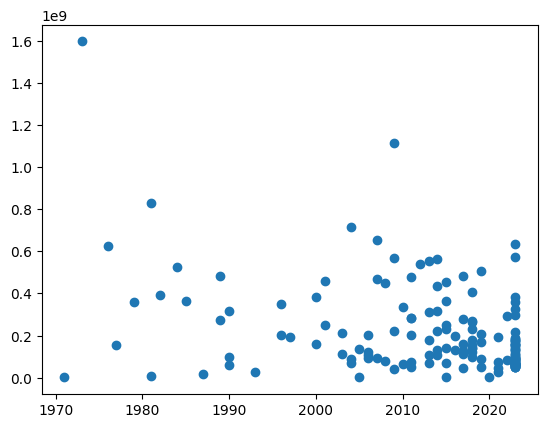

In [124]:
plt.scatter(linked_movies['Year'], linked_movies['Domestic_Gross'])

### Chart Planning
- Basic domestic scatter over years
- worldwide scatter over years w budget and profit
- worldwide line avgs over years w budget and profit colored
- isolate scatter by main 3 franchises: MI, FF, Marvel using ‘BoxOff_Rank’
- mark Original on performance metrics (w/ color?)

In [125]:
px.scatter(x=linked_movies['Year'], y=linked_movies['Domestic_Gross'], data_frame=linked_movies,
           color=linked_movies['Original'].astype(bool), 
           hover_data={'Item': True, 'Year':True, 'Domestic_Gross': True, 'Original': True},
           title='Domestic Gross - Linked Nodes')

In [126]:
df_long = linked_movies.melt(id_vars=['Year', 'Item'], value_vars=['Worldwide_Gross','Production_Budget'], var_name='type', value_name='amount')
fig = px.scatter(df_long, x='Year', y='amount', color='type', 
                 labels={'amount': 'Amount ($)', 'Item': 'Movie Title', 'type': 'Type'},
                 title='Budget and Gross of Movies')
fig.show()

Text(0.5, 1.0, 'Mean Performance Worldwide - Linked Nodes')

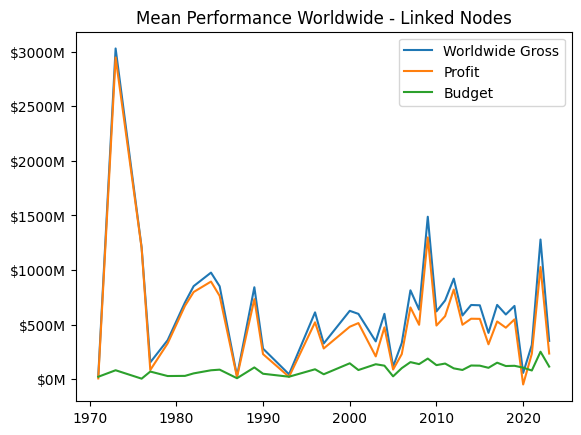

In [127]:
year_df = linked_movies.groupby('Year', as_index=False)[['Worldwide_Gross', 'Domestic_Gross', 'Production_Budget', 'Profit']].mean()
plt.plot(year_df['Year'], year_df['Worldwide_Gross'])
plt.plot(year_df['Year'], year_df['Profit'])
plt.plot(year_df['Year'], year_df['Production_Budget'])
plt.legend(['Worldwide Gross', 'Profit', 'Budget'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title("Mean Performance Worldwide - Linked Nodes")

In [138]:
def franchise_plot(rank, title='Franchise'):
    df = linked_movies[linked_movies['BoxOff_Rank'].isin(rank)]
    fig, ax = plt.subplots()
    ax.plot(df['Year'], df['Worldwide_Gross'], color='blue', marker='o')
    ax.plot(df['Year'], df['Profit'], color='green', marker='o')
    ax.plot(df['Year'], df['Production_Budget'], color='red', marker='o')
    ax.plot(df['Year'], df['Domestic_Gross'], color = 'purple', marker='o')
    ax.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
    ax.set_title(title+" Performance")
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

    return fig

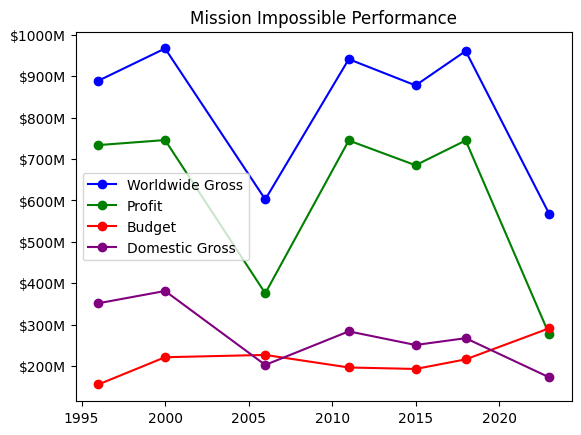

In [144]:
mi_fig = franchise_plot([13], 'Mission Impossible')
plt.show(mi_fig)

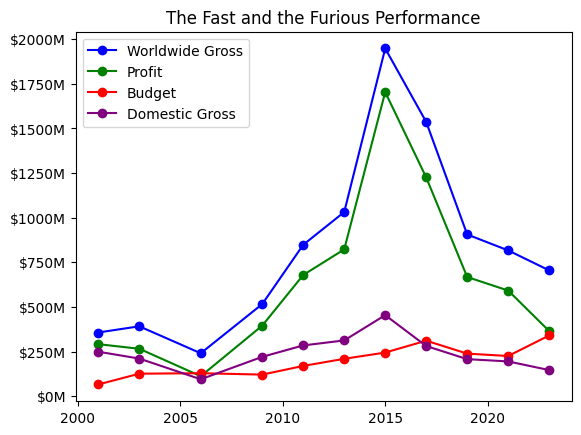

In [145]:
ff_fig = franchise_plot([18], 'The Fast and the Furious')
plt.show(ff_fig)

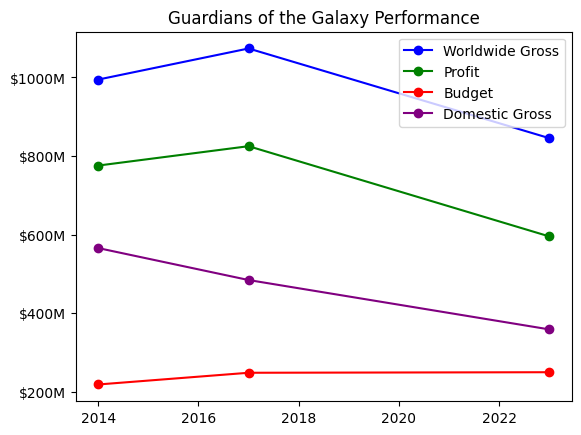

In [146]:
gg_fig = franchise_plot([4], 'Guardians of the Galaxy')
plt.show(gg_fig)

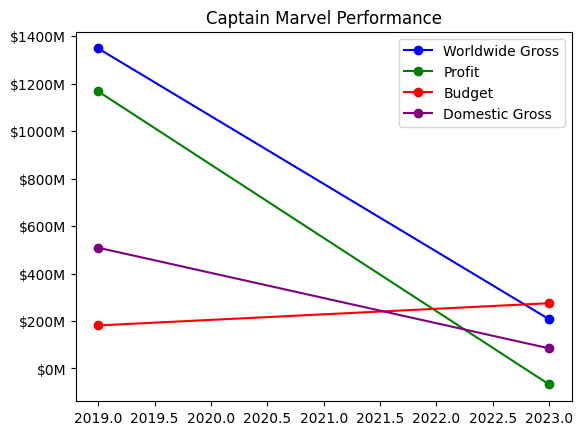

In [148]:
mar_fig = franchise_plot([30], 'Captain Marvel')
plt.show(mar_fig)

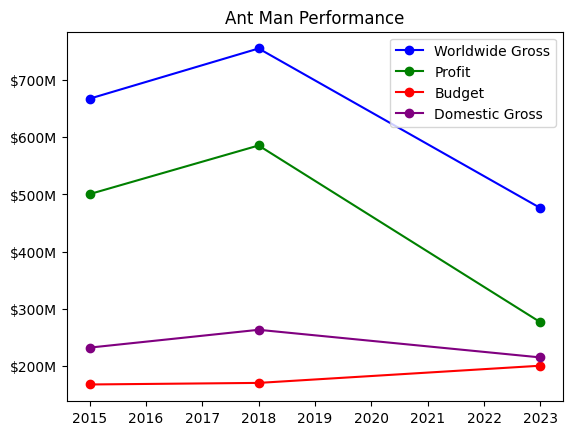

In [149]:
ant_fig = franchise_plot([8], 'Ant Man')
plt.show(ant_fig)

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/2027293094.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



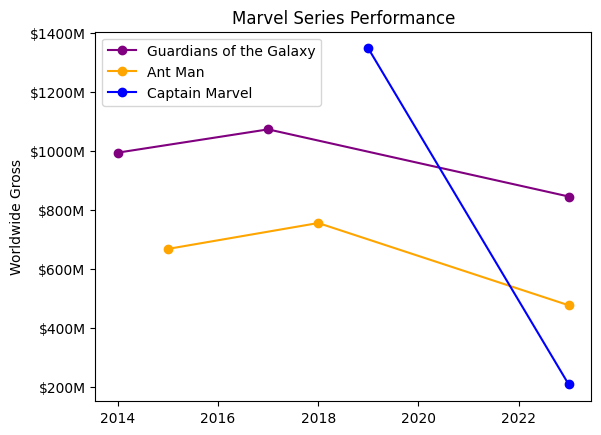

In [ ]:
guard_df = linked_movies[(linked_movies['BoxOff_Rank'] == 4)] #| (linked_movies['BoxOff_Rank'] == 8) | (linked_movies['BoxOff_Rank'] == 30)]
ant_df = linked_movies[(linked_movies['BoxOff_Rank'] == 8)]
mars_df = linked_movies[(linked_movies['BoxOff_Rank'] == 30)]
plt.plot(guard_df['Year'], guard_df['Worldwide_Gross'], color='purple', marker='o')
plt.plot(ant_df['Year'], ant_df['Worldwide_Gross'], color='orange', marker='o')
plt.plot(mars_df['Year'], mars_df['Worldwide_Gross'], color='blue', marker='o')
#plt.plot(mar_df['Year'], mar_df['Profit'], color='green', marker='o')
# plt.plot(mar_df['Year'], mar_df['Production_Budget'], color='red', marker='o')
# plt.plot(mar_df['Year'], mar_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Guardians of the Galaxy', 'Ant Man', 'Captain Marvel'])
plt.title("Marvel Series Performance")
plt.ylabel('Worldwide Gross')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

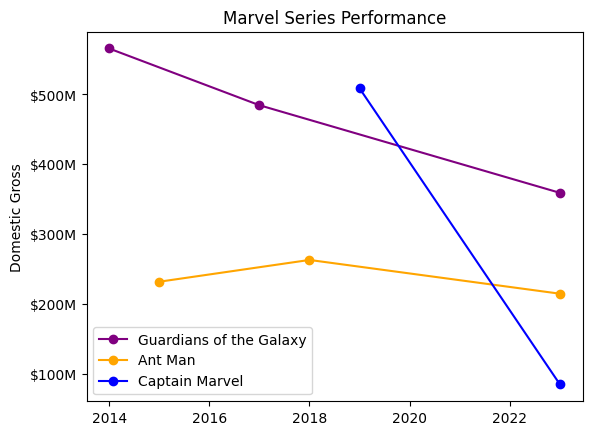

In [ ]:
plt.plot(guard_df['Year'], guard_df['Domestic_Gross'], color='purple', marker='o')
plt.plot(ant_df['Year'], ant_df['Domestic_Gross'], color='orange', marker='o')
plt.plot(mars_df['Year'], mars_df['Domestic_Gross'], color='blue', marker='o')
#plt.plot(mar_df['Year'], mar_df['Profit'], color='green', marker='o')
# plt.plot(mar_df['Year'], mar_df['Production_Budget'], color='red', marker='o')
# plt.plot(mar_df['Year'], mar_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Guardians of the Galaxy', 'Ant Man', 'Captain Marvel'])
plt.title("Marvel Series Performance")
plt.ylabel('Domestic Gross')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/567389774.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



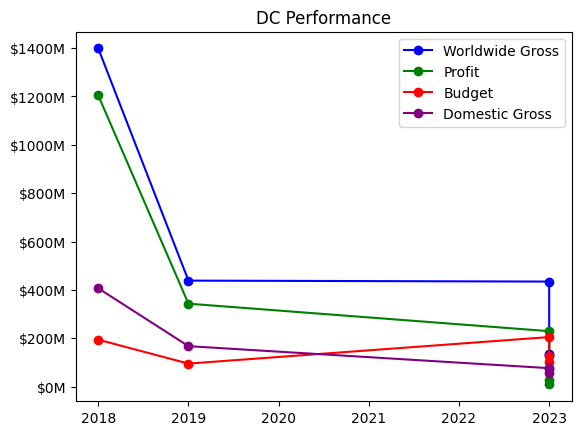

In [ ]:
dc_df = linked_movies[(linked_movies['BoxOff_Rank'] == 33) | (linked_movies['BoxOff_Rank'] == 34) | (linked_movies['BoxOff_Rank'] == 44)]
dc_df.sort_values(by='Year', inplace=True)
plt.plot(dc_df['Year'], dc_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(dc_df['Year'], dc_df['Profit'], color='green', marker='o')
plt.plot(dc_df['Year'], dc_df['Production_Budget'], color='red', marker='o')
plt.plot(dc_df['Year'], dc_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("DC Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

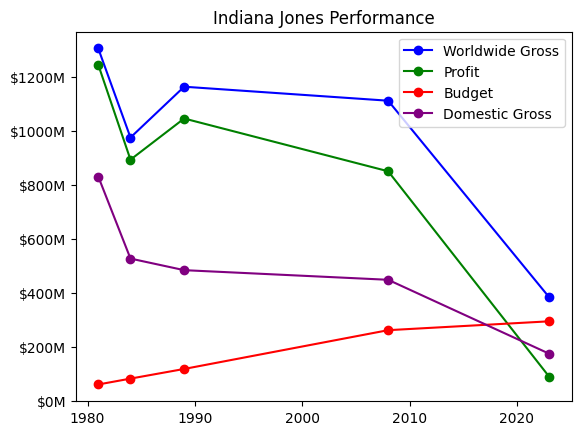

In [152]:
ij_fig = franchise_plot([12], 'Indiana Jones')
plt.show(ij_fig)

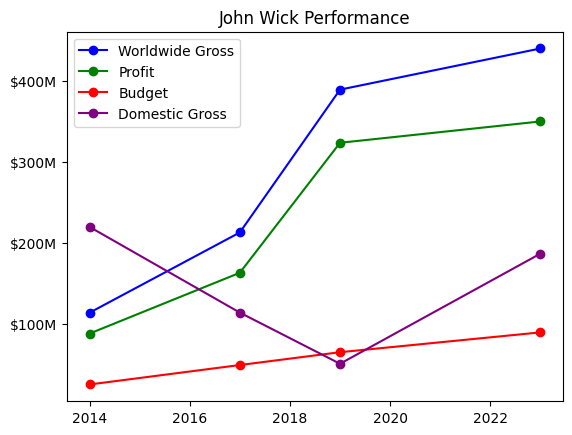

In [156]:
jw_fig = franchise_plot([9], 'John Wick')
plt.show(jw_fig)